In [1]:
import keras
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Fully connected net в Keras

In [2]:
# загрузим датасет MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [6]:
# сделаем one-hot encoding для таргетов
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
# опишем модель
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(70, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [113]:
#обучим
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.1),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=1000,
          epochs=50,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s - loss: 2.0553 - acc: 0.4949 - val_loss: 1.7960 - val_acc: 0.6783
Epoch 2/50
60000/60000 [==============================] - 1s - loss: 1.5799 - acc: 0.7172 - val_loss: 1.3510 - val_acc: 0.7644
Epoch 3/50
60000/60000 [==============================] - 1s - loss: 1.1801 - acc: 0.7918 - val_loss: 1.0117 - val_acc: 0.8201
Epoch 4/50
60000/60000 [==============================] - 1s - loss: 0.8991 - acc: 0.8353 - val_loss: 0.7895 - val_acc: 0.8504
Epoch 5/50
60000/60000 [==============================] - 1s - loss: 0.7206 - acc: 0.8586 - val_loss: 0.6503 - val_acc: 0.87420.85
Epoch 6/50
60000/60000 [==============================] - 1s - loss: 0.6053 - acc: 0.8749 - val_loss: 0.5578 - val_acc: 0.8869
Epoch 7/50
60000/60000 [==============================] - 1s - loss: 0.5266 - acc: 0.8870 - val_loss: 0.4950 - val_acc: 0.8945
Epoch 8/50
60000/60000 [==============================] -

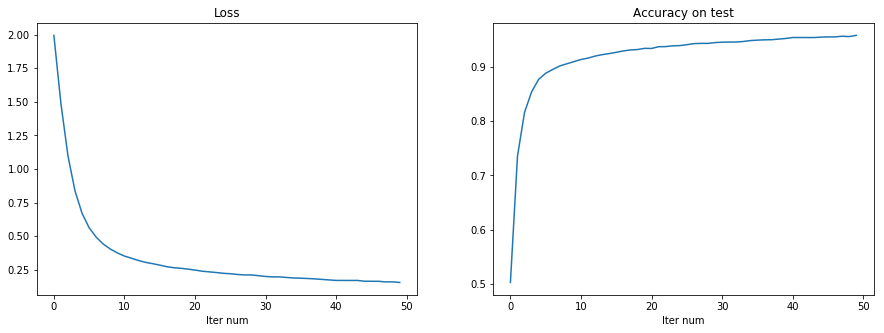

In [100]:
# динамику обучения можно посмотреть через объект history, которую возвращает model.fit

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("Loss")
plt.xlabel("Iter num")
plt.plot(history.history["loss"])

plt.subplot(1, 2, 2)
plt.title("Accuracy on test")
plt.xlabel("Iter num")
plt.plot(history.history["acc"])

In [101]:
#сравните графики loss'a и accuracy для разного количества внутренних слоёв FCN

## Batch Normalisation

Для ускорения обучения полносвязных нейронных сетей следует применять технику Batch Normalisation. Она преобразует активации нейронов слоя, после которого стоит так, чтобы они имели нулевое матожидание и единичную дисперсию. Такое преобразование позволяет ослабить угасание градиентов.

In [3]:
# после каждого Dense слоя сделайте model.add(BatchNormalization())
# сравните графики изменения loss и accuracу для сети с BN и без него

## Dropout

In [4]:
# после каждого Dense слоя сделайте model.add(Dropout(0.25))
# сравните графики изменения loss и accuracу для сети с DO и без него

# Convolutional Neural Network

In [8]:
# загрузим датасет MNIST
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170426368/170498071 [============================>.] - ETA: 0s

In [21]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [35]:
x_train[512].shape

(32, 32, 3)

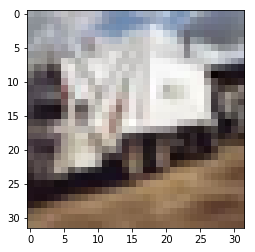

In [16]:
plt.imshow(x_train[512])

In [17]:
# сделаем one-hot encoding для таргетов
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [42]:
import numpy as np

In [44]:
obj = np.random.normal(size=(2,2,3))

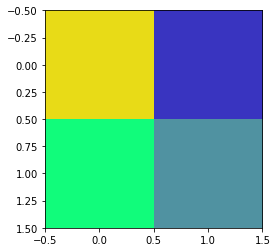

In [45]:
plt.imshow(obj)

In [52]:
# описываем модель

input_shape=(2, 2, 3)
num_classes = 10

model = Sequential()
model.add(Conv2D(1, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape,kernel_initializer = keras.initializers.Ones()))

In [56]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [53]:
t1 = model.predict(obj.reshape(1,2,2,3))

In [54]:
t1

array([[[[ 0.]]]], dtype=float32)

In [57]:
model.weights

[<tf.Variable 'conv2d_6/kernel:0' shape=(2, 2, 3, 1) dtype=float32_ref>,
 <tf.Variable 'conv2d_6/bias:0' shape=(1,) dtype=float32_ref>]

In [133]:
batch_size=300
epochs=50

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
20400/50000 [===========>..................] - ETA: 211s - loss: 2.1616 - acc: 0.2050

KeyboardInterrupt: 

## Cохранение и загрузка моделей

In [134]:
model.save("model.bin")

In [135]:
model.load_weights("model.bin")

# Finetuning

In [2]:
import os

In [3]:
path_to_dataset = 'oxfordflower17/'

if not os.path.isdir(path_to_dataset):
    ! wget http://www.robots.ox.ac.uk/~vgg/data/bicos/data/oxfordflower17.tar
    ! tar -xf oxfordflower17.tar

In [4]:
import scipy
import scipy.io as  io
labels = scipy.io.loadmat(path_to_dataset + 'imagelabels.mat')['labels'][0]
labels -= 1
print(labels)
print(len(labels))

[ 0  0  0 ..., 16 16 16]
1360


In [5]:
path_to_images = path_to_dataset + 'jpg/'
images = os.listdir(path_to_images)
images = [path_to_images+i for i in images if i.endswith('.jpg')]
images.sort()
print(len(images))

1360


In [6]:
import numpy as np
import cv2
import skimage.transform as skit

train_data = []
train_labels = []
test_data = []
test_labels = []

for i,image in enumerate(images):
    if i % 80 == 0: 
        perm = np.random.permutation(80)
        
    image = cv2.imread(images[i], cv2.IMREAD_COLOR)[:,:,[2,1,0]]
    image = skit.rescale(image, (230/image.shape[0], 230/image.shape[1]))
        
    if perm[i % 80] < 60:
        train_data.append(image)
        train_labels.append(labels[i])
    else:
        test_data.append(image)
        test_labels.append(labels[i])

        
x_train = np.array(train_data)
x_test = np.array(test_data)

y_train = np.array(train_labels)
y_test = np.array(test_labels)

/Users/binom/.anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [7]:
# сделаем one-hot encoding для таргетов
y_train = keras.utils.to_categorical(y_train, 17)
y_test = keras.utils.to_categorical(y_test, 17)

In [11]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(input_shape=(230, 230, 3),weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(30, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(17, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model on the new data for a few epochs
model.fit(x_train, y_train,
          batch_size=50,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit(x_train, y_train,
          batch_size=50,
          epochs=50,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 1020 samples, validate on 340 samples
Epoch 1/10
1020/1020 [==============================] - 506s - loss: 2.4967 - acc: 0.2461 - val_loss: 2.3971 - val_acc: 0.2618
Epoch 2/10
1020/1020 [==============================] - 503s - loss: 1.7292 - acc: 0.5637 - val_loss: 2.0289 - val_acc: 0.3647
Epoch 3/10
1020/1020 [==============================] - 528s - loss: 1.3294 - acc: 0.7049 - val_loss: 1.4292 - val_acc: 0.5500
Epoch 4/10
1020/1020 [==============================] - 509s - loss: 1.0214 - acc: 0.7843 - val_loss: 1.2258 - val_acc: 0.5676
Epoch 5/10
1020/1020 [==============================] - 491s - loss: 0.8425 - acc: 0.8255 - val_loss: 0.8950 - val_acc: 0.7265
Epoch 6/10
1020/1020 [==============================] - 431s - loss: 0.7005 - acc: 0.8451 - val_loss: 0.8682 - val_acc: 0.7353
Epoch 7/10
1020/1020 [==============================] - 441s - loss: 0.6159 - acc: 0.8618 - val_loss: 0.7358 - val_acc: 0.7794
Epoch 8/10
1020/1020 [==============================] - 475s - l

KeyboardInterrupt: 